In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

- Tratamiento de los dos data que hablan sobre movimientos de los usuarios

In [2]:
df1 = pd.read_csv('C:/Users/CeX-Laguna/Downloads/df_final_web_data_pt_1.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/CeX-Laguna/Downloads/df_final_web_data_pt_1.txt'

In [ ]:
df2 = pd.read_csv('C:/Users/CeX-Laguna/Downloads/df_final_web_data_pt_2.txt')

In [ ]:
df1.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

In [ ]:
df2.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

- Tratamiento del demo final 

In [ ]:
df_web_data = pd.concat([df1, df2], axis=0)

In [3]:
demo = pd.read_csv("CSV/df_final_demo.txt", low_memory=False)

In [4]:
demo.isnull().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [5]:
demo = demo.fillna('Unknown')

In [6]:
demo.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [7]:
frequency_gendr = demo['gendr'].value_counts()
frequency_gendr

gendr
U          24122
M          23724
F          22746
Unknown       14
X              3
Name: count, dtype: int64

In [8]:
frequency_table2 = demo['gendr'].value_counts(normalize=True).head(3)

In [9]:
demo['clnt_age'] = pd.to_numeric(demo['clnt_age'], errors='coerce')


In [10]:
demo_filtrado = demo[demo['clnt_age'].between(20, 80)]

In [11]:
demo_filtrado.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

<Axes: xlabel='clnt_age', ylabel='Count'>

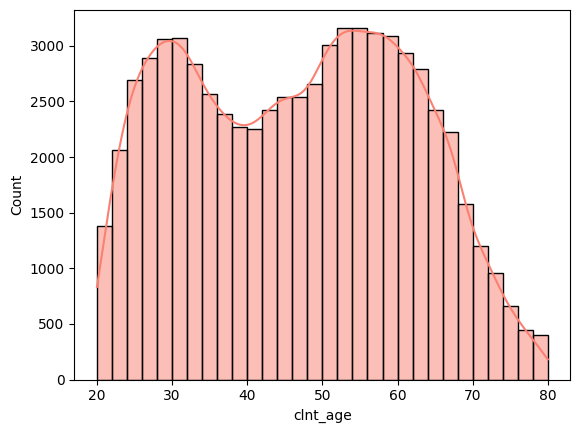

In [12]:
sns.histplot(demo_filtrado['clnt_age'], kde=True, bins=30, color="salmon")

In [13]:
demo_filtrado['bal'] = pd.to_numeric(demo_filtrado['bal'], errors='coerce')


C:\Users\noeli\AppData\Local\Temp\ipykernel_33176\3113405766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_filtrado['bal'] = pd.to_numeric(demo_filtrado['bal'], errors='coerce')


In [14]:
demo_filtrado['bal'] = demo_filtrado['bal'].round(2)

C:\Users\noeli\AppData\Local\Temp\ipykernel_33176\672603886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_filtrado['bal'] = demo_filtrado['bal'].round(2)


In [15]:
demo_filtrado

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


### EMPEZAR A BUSCAR RELACION ENTRE LAS COLUMNAS. RELACION + GRAFICO

In [16]:
frequency_bal = demo_filtrado['bal'].value_counts()

proportion_bal = demo_filtrado['bal'].value_counts(normalize=True)

frequency_bal, proportion_bal

(bal
 31188.62     5
 29388.51     4
 31398.74     3
 29389.11     3
 24953.79     3
             ..
 135143.26    1
 25561.22     1
 41751.20     1
 32797.00     1
 522498.72    1
 Name: count, Length: 68510, dtype: int64,
 bal
 31188.62     0.000073
 29388.51     0.000058
 31398.74     0.000044
 29389.11     0.000044
 24953.79     0.000044
                ...   
 135143.26    0.000015
 25561.22     0.000015
 41751.20     0.000015
 32797.00     0.000015
 522498.72    0.000015
 Name: proportion, Length: 68510, dtype: float64)

Convertir los object en float:

In [17]:
cols_to_fix = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'num_accts', 
               'calls_6_mnth', 'logons_6_mnth']

for col in cols_to_fix:
    demo_filtrado[col] = (
        demo_filtrado[col]
        .astype(str)
        .str.replace(r'[^0-9.-]', '', regex=True)  
        .str.strip()                              
        .replace('', None)                        
        .astype(float)                             
    )


C:\Users\noeli\AppData\Local\Temp\ipykernel_33176\2077925968.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_filtrado[col] = (
C:\Users\noeli\AppData\Local\Temp\ipykernel_33176\2077925968.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_filtrado[col] = (
C:\Users\noeli\AppData\Local\Temp\ipykernel_33176\2077925968.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [18]:
frequency_cuentas = demo_filtrado['num_accts'].value_counts()
frequency_cuentas

num_accts
2.0    54049
3.0    12192
4.0     2201
5.0      281
6.0       33
7.0        8
1.0        2
8.0        1
Name: count, dtype: int64

<Axes: xlabel='num_accts', ylabel='Count'>

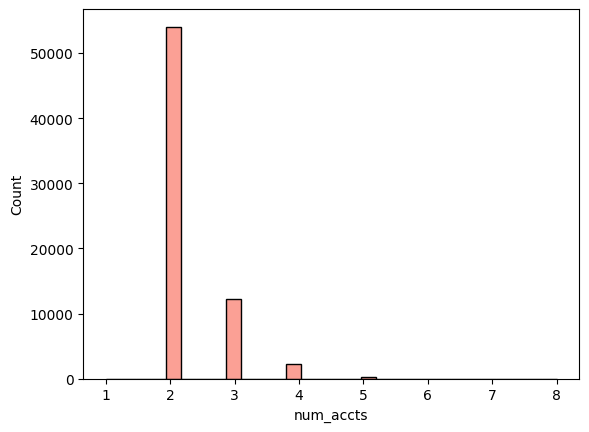

In [19]:
sns.histplot(demo_filtrado['num_accts'], bins=30, color="salmon")

In [20]:
frequency_llamadas = demo_filtrado['calls_6_mnth'].value_counts()
frequency_llamadas

calls_6_mnth
6.0    13818
1.0    10741
2.0     9944
3.0     8492
0.0     7585
4.0     6935
5.0     6484
7.0     4768
Name: count, dtype: int64

<Axes: xlabel='calls_6_mnth', ylabel='Count'>

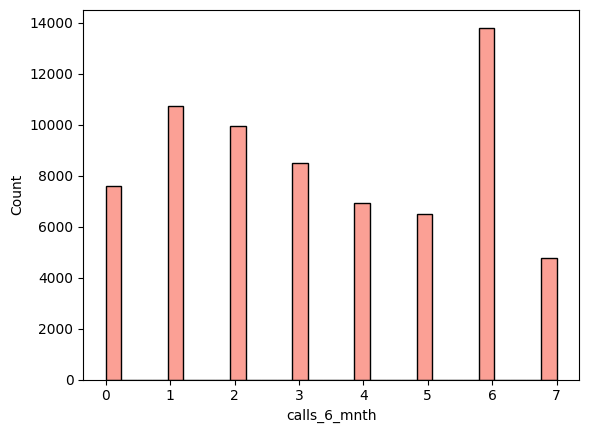

In [21]:
sns.histplot(demo_filtrado['calls_6_mnth'], color="salmon")

In [22]:
frequency_entradas = demo_filtrado['logons_6_mnth'].value_counts()
frequency_entradas

logons_6_mnth
9.0    12133
3.0     9973
4.0     9939
7.0     9624
5.0     9008
6.0     7667
8.0     4737
2.0     2861
1.0     2825
Name: count, dtype: int64

<Axes: xlabel='logons_6_mnth', ylabel='Count'>

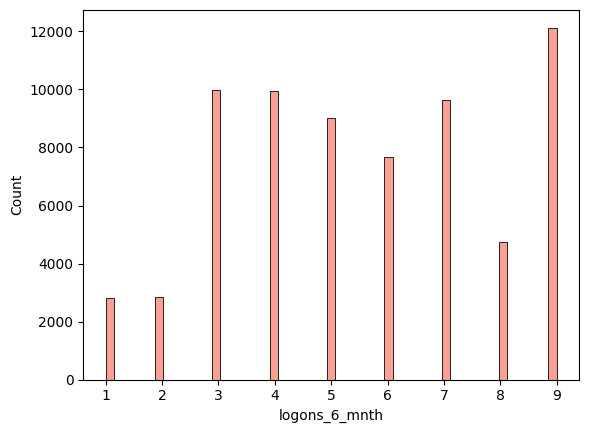

In [23]:
sns.histplot(demo_filtrado['logons_6_mnth'], color="salmon")

In [24]:
frequency_años = demo_filtrado['clnt_tenure_yr'].value_counts()
frequency_años

clnt_tenure_yr
6.0     6876
5.0     6636
7.0     4864
15.0    4501
4.0     4409
8.0     3983
14.0    3610
12.0    3601
13.0    3572
9.0     3308
11.0    2894
10.0    2754
16.0    2664
21.0    2179
20.0    1531
22.0    1442
17.0    1349
23.0    1222
18.0    1184
19.0    1133
24.0     810
26.0     630
27.0     599
28.0     483
25.0     461
3.0      418
30.0     293
29.0     293
33.0     195
32.0     181
34.0     168
31.0     161
35.0     101
2.0       76
36.0      36
37.0      33
38.0      31
48.0      16
55.0       9
40.0       9
50.0       7
39.0       7
42.0       6
43.0       6
47.0       6
46.0       4
51.0       4
49.0       4
44.0       2
52.0       2
54.0       1
41.0       1
45.0       1
62.0       1
Name: count, dtype: int64

CON ESTO PODEMOS SABER CUANTOS AÑOS LLEVAN UNA GRAN PARTE DE NUESTROS CLIENTES, EN EL QUE SE PUEDE VER QUE SOBRESALEN 5 Y 6 AÑOS

<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

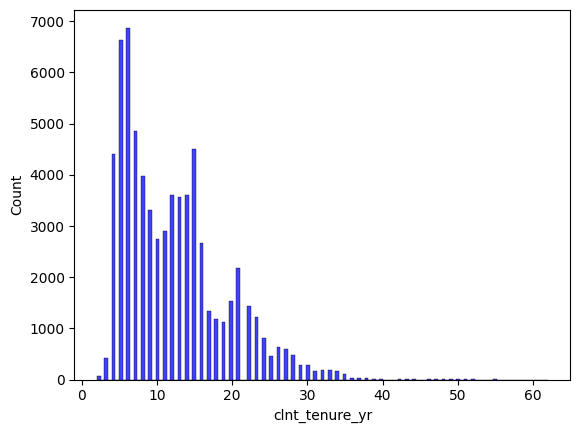

In [25]:
sns.histplot(demo_filtrado['clnt_tenure_yr'], color="blue")

#### -Lo que nos muestra este gráfico que hay más dinero en los clientes que tienen de 5 a 7 cuentas.

In [26]:
correlation = demo_filtrado['clnt_age'].corr(demo_filtrado['logons_6_mnth'], method='spearman')
correlation

np.float64(0.06945918370318671)

In [27]:
correlation2 = demo_filtrado['calls_6_mnth'].corr(demo_filtrado['logons_6_mnth'], method='spearman')
correlation2

np.float64(0.8301436005646146)

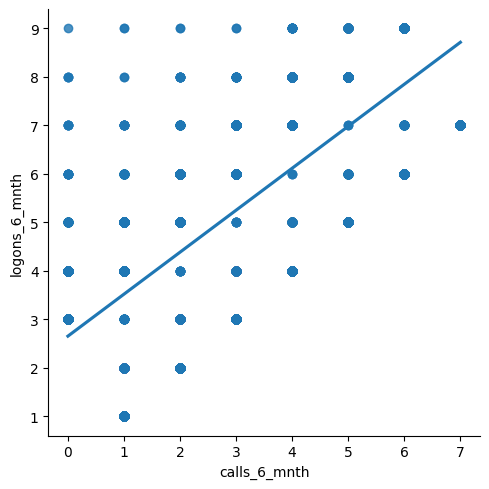

In [28]:
sns.lmplot(data=demo_filtrado,
            x='calls_6_mnth',
            y='logons_6_mnth')

In [29]:
correlation = demo_filtrado['clnt_age'].corr(demo_filtrado['bal'], method= 'spearman')
correlation

np.float64(0.3234754725681508)

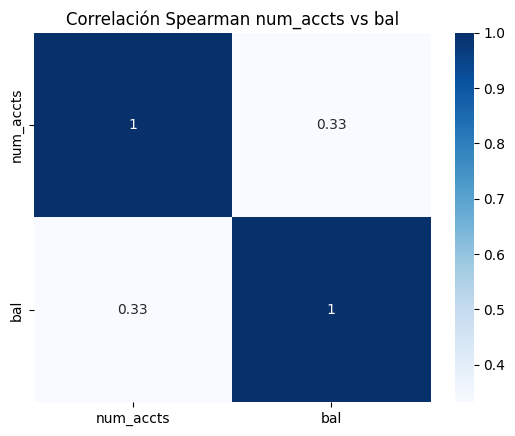

In [30]:
corr = demo_filtrado[['num_accts','bal']].corr(method='spearman')

sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlación Spearman num_accts vs bal")
plt.show()


In [31]:
correlation5 = demo_filtrado['clnt_tenure_yr'].corr(demo_filtrado['bal'], method='spearman')
correlation5

np.float64(0.26608372289098065)

In [32]:
correlation6 = demo_filtrado['clnt_age'].corr(demo_filtrado['num_accts'], method='spearman')
correlation6

np.float64(-0.028721715866273045)

C:\Users\noeli\AppData\Local\Temp\ipykernel_33176\224758470.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=demo_filtrado, x='gendr', y='num_accts', palette="coolwarm")


<Axes: xlabel='gendr', ylabel='num_accts'>

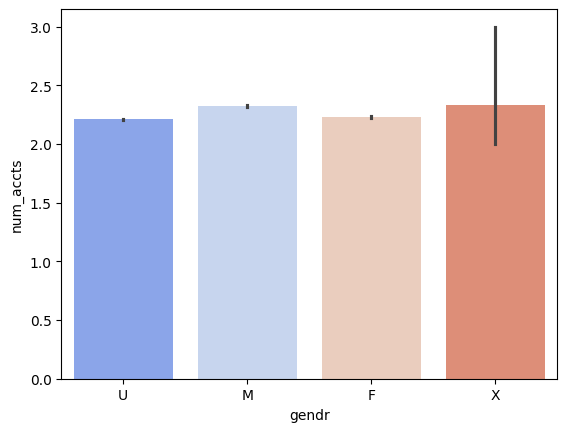

In [33]:
sns.barplot(data=demo_filtrado, x='gendr', y='num_accts', palette="coolwarm")

In [34]:
correlation7 = demo_filtrado['clnt_age'].corr(demo_filtrado['clnt_tenure_yr'], method='spearman')
correlation7

np.float64(0.2907774365775862)

### SUBIDA DE LOS OTROS ARCHIVOS Y UNIÓN

In [35]:
df1 = pd.read_csv('CSV/df_final_experiment_clients.txt')
df1

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


#### TRATAMIENTO DEL CSV PARA SABER VALORES NULOS Y COMO TRATARLOS

In [36]:
df1.isnull().sum()

client_id        0
Variation    20109
dtype: int64

In [37]:
frequency_df1 = df1['Variation'].value_counts()
frequency_df1

Variation
Test       26968
Control    23532
Name: count, dtype: int64

In [38]:
df1_filtrado = df1[df1['Variation'].isin(['Control', 'Test'])]
df1_filtrado

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


#### MERGE ENTRE DEMO (NUESTRO ORIGINAL - Y EL CSV TEST/CONTROL)

In [39]:
demo_unido = pd.merge(df1_filtrado, demo, on='client_id', how='inner')
demo_unido

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.9,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
50495,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0
50496,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
50497,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0
50498,5230357,Test,23.0,278.0,30.5,M,2.0,61349.7,0.0,3.0


### Que cliente promedio tenemos?

In [40]:
demo_unido= demo_unido[demo_unido['clnt_age'].between(18, 100)]
demo_unido = demo_unido[demo_unido['bal'] > 0]

In [41]:
demo_unido[['clnt_age']].describe()

,clnt_age
count,50425.000000
mean,47.356490
std,15.492807
min,18.000000
25%,33.500000
50%,48.000000
75%,59.500000
max,96.000000


In [42]:
demo_unido[['calls_6_mnth']].describe()


,calls_6_mnth
count,50425.0
unique,7.0
top,6.0
freq,12220.0


In [43]:
demo_unido[['logons_6_mnth']].describe()

,logons_6_mnth
count,50425.0
unique,7.0
top,9.0
freq,12345.0


In [44]:
demo_unido[['clnt_tenure_yr']].describe()

,clnt_tenure_yr
count,50425.0
unique,53.0
top,6.0
freq,5062.0


In [45]:
demo_unido[['num_accts']].describe()

,num_accts
count,50425.0
unique,7.0
top,2.0
freq,39666.0


In [49]:
demo_unido[['bal']].mean()

bal    149654.453758
dtype: object

In [50]:
demo_unido[['bal']].median()

bal    65856.25
dtype: object

In [52]:
demo_unido

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.9,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
50495,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0
50496,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
50497,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0
50498,5230357,Test,23.0,278.0,30.5,M,2.0,61349.7,0.0,3.0


In [53]:
perfil_por_grupo = demo_unido.groupby('Variation')[
    ['clnt_age', 'bal', 'num_accts', 'clnt_tenure_yr', 'logons_6_mnth', 'calls_6_mnth']
].agg(['mean', 'median'])
perfil_por_grupo


clnt_age                   bal           num_accts         \
                mean median           mean    median      mean median   
Variation                                                               
Control    47.534216   48.5   150286.21309  66119.51  2.260065    2.0   
Test       47.201396   47.5  149103.145377  65524.19  2.250084    2.0   

          clnt_tenure_yr        logons_6_mnth        calls_6_mnth         
                    mean median          mean median         mean median  
Variation                                                                 
Control        12.092348   11.0      6.167716    6.0     3.130607    3.0  
Test            11.98845   11.0      6.103094    6.0     3.063208    3.0

In [62]:
age_median = demo_unido['clnt_age'].median()

In [65]:
age_median

np.float64(48.0)

In [72]:
cliente_objetivo = demo_unido[
    (demo_unido['logons_6_mnth'] > demo_unido['logons_6_mnth'].median()) &
    (demo_unido['clnt_age'] < age_median) &
    (demo_unido['bal'] > demo_unido['bal'].median())]

In [73]:
cliente_objetivo

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
10,438567,Test,15.0,186.0,38.0,M,2.0,89161.52,6.0,9.0
21,9987707,Test,28.0,341.0,46.5,M,3.0,88607.54,6.0,9.0
25,2317698,Test,15.0,184.0,42.5,F,2.0,116894.92,5.0,8.0
33,8766054,Test,12.0,153.0,26.0,M,2.0,76660.36,4.0,7.0
36,1242238,Control,11.0,139.0,25.0,M,3.0,72557.7,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...
50428,3667184,Test,14.0,179.0,44.0,F,2.0,76827.15,6.0,9.0
50432,2856801,Test,15.0,183.0,33.0,M,2.0,115738.55,6.0,9.0
50441,7511753,Test,14.0,172.0,42.5,F,2.0,256153.18,6.0,9.0
50481,5931031,Test,11.0,142.0,30.5,M,3.0,66331.7,5.0,8.0


In [79]:
comparacion = pd.DataFrame({
    'Promedio general': demo_unido[['clnt_age', 'bal', 'num_accts', 'clnt_tenure_yr', 'logons_6_mnth', 'calls_6_mnth']].mean(),
    'Cliente objetivo': cliente_objetivo[['clnt_age', 'bal', 'num_accts', 'clnt_tenure_yr', 'logons_6_mnth', 'calls_6_mnth']].mean()
})
comparacion


,Promedio general,Cliente objetivo
clnt_age,47.35649,35.698231
bal,149654.453758,205719.536578
num_accts,2.254735,2.644873
clnt_tenure_yr,12.036867,11.757154
logons_6_mnth,6.133208,8.415342
calls_6_mnth,3.094616,5.394078
